In [1]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

object_detection_model.eval(); ## Setting Model for Evaluation/Prediction

C:\Users\chari\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\chari\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


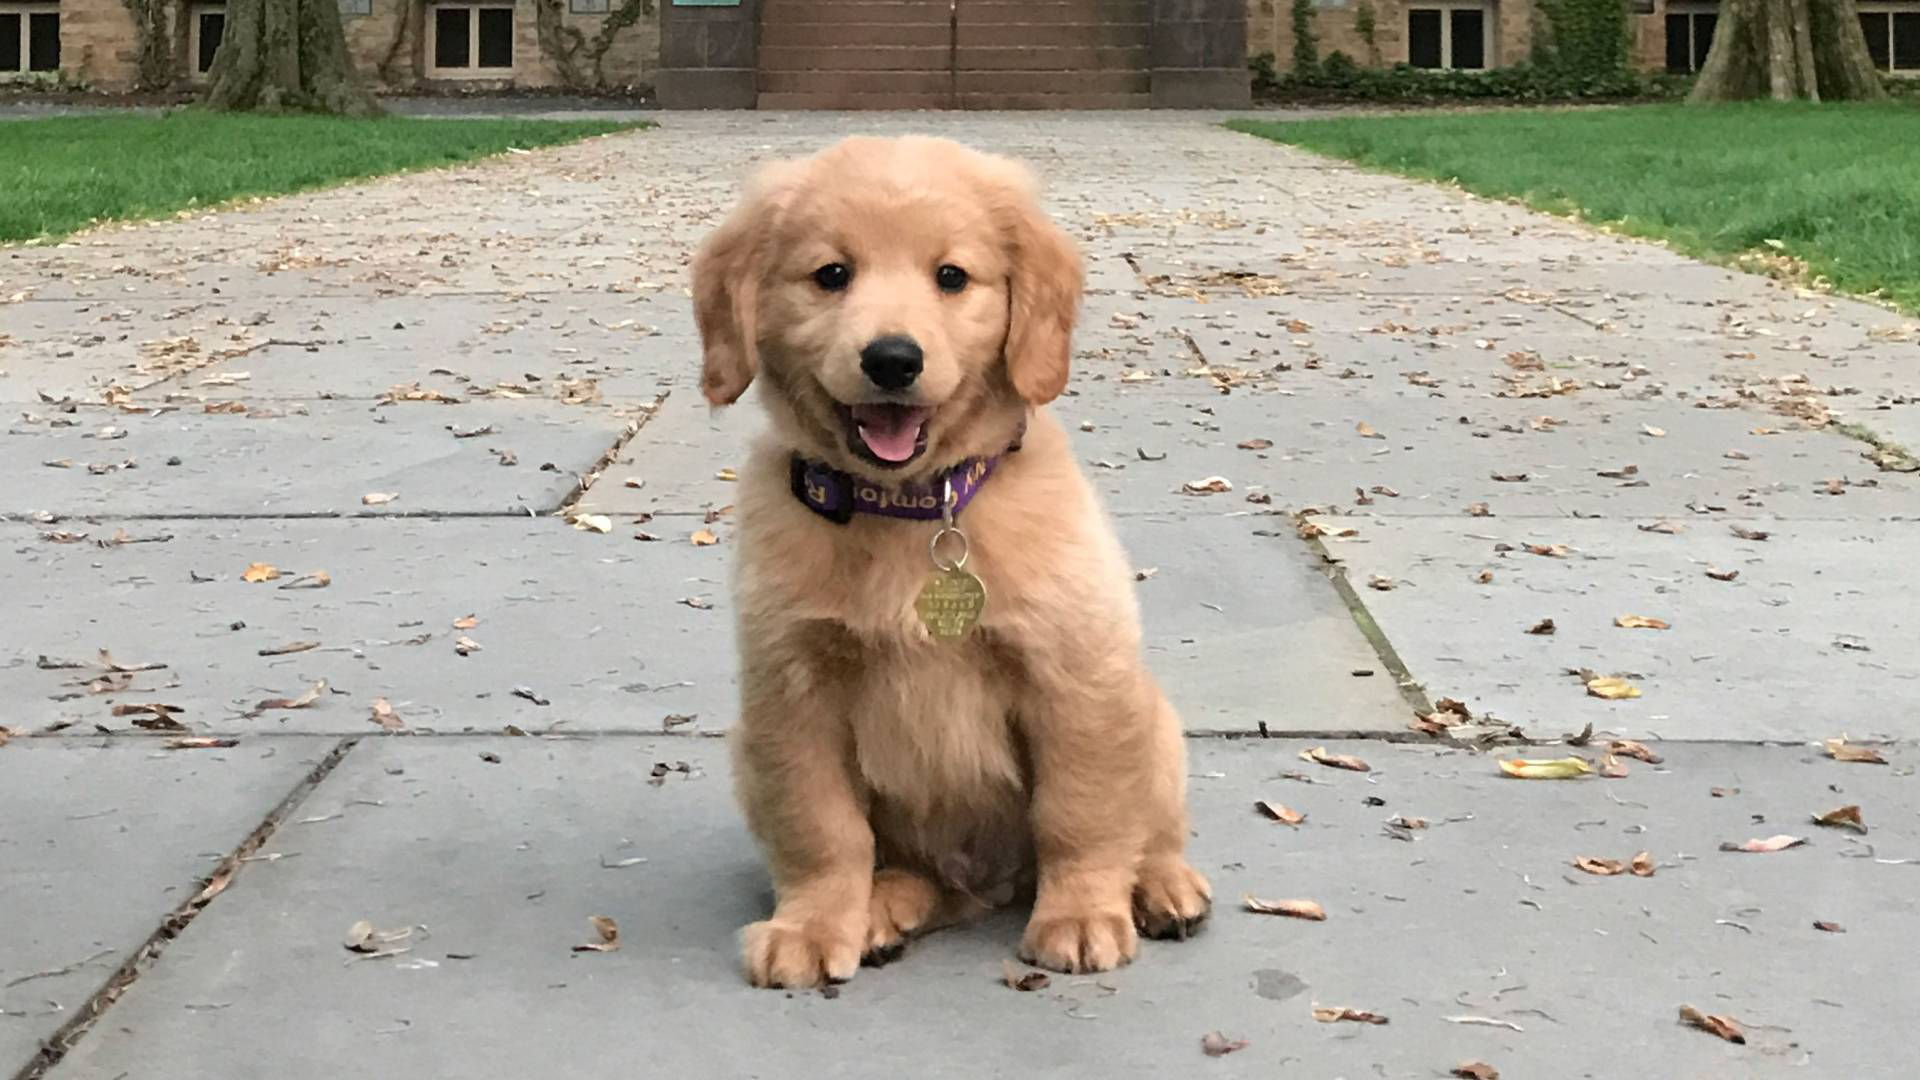

In [2]:
from PIL import Image

test_img = Image.open("dog.jpg")

test_img

In [3]:
import torchvision.transforms as transforms

# Load the image
test_img = Image.open("dog.jpg")

# Define the transformation - convert image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),  
])

# Apply the transformation to the image
test_img_tensor = transform(test_img)
test_img_tensor

tensor([[[0.1059, 0.0980, 0.0941,  ..., 0.0980, 0.1255, 0.1490],
         [0.1373, 0.1255, 0.1176,  ..., 0.1373, 0.1608, 0.1765],
         [0.1922, 0.1843, 0.1765,  ..., 0.2039, 0.2235, 0.2392],
         ...,
         [0.6510, 0.6510, 0.6549,  ..., 0.7451, 0.7490, 0.7529],
         [0.6549, 0.6549, 0.6588,  ..., 0.7451, 0.7490, 0.7529],
         [0.6588, 0.6588, 0.6588,  ..., 0.7451, 0.7490, 0.7529]],

        [[0.0784, 0.0706, 0.0667,  ..., 0.0745, 0.1020, 0.1255],
         [0.1137, 0.1020, 0.0941,  ..., 0.1137, 0.1373, 0.1529],
         [0.1686, 0.1608, 0.1529,  ..., 0.1804, 0.2000, 0.2157],
         ...,
         [0.6588, 0.6588, 0.6549,  ..., 0.7529, 0.7569, 0.7608],
         [0.6627, 0.6627, 0.6588,  ..., 0.7529, 0.7569, 0.7608],
         [0.6667, 0.6667, 0.6588,  ..., 0.7529, 0.7569, 0.7608]],

        [[0.0392, 0.0314, 0.0275,  ..., 0.0275, 0.0549, 0.0784],
         [0.0667, 0.0549, 0.0471,  ..., 0.0667, 0.0902, 0.1059],
         [0.1216, 0.1137, 0.1059,  ..., 0.1255, 0.1451, 0.

In [4]:
test_img_tensor.shape


torch.Size([3, 1080, 1920])

In [5]:
#  We added this dimension because models work on batches of images.
test_img_tensor = test_img_tensor.unsqueeze(dim=0)
test_img_tensor.shape

torch.Size([1, 3, 1080, 1920])

In [6]:
preds = object_detection_model(test_img_tensor)
preds

[{'boxes': tensor([[ 696.3849,  125.3516, 1214.0686,  998.1392],
          [1498.3927,  753.1480, 1600.1484,  779.2158],
          [ 714.5466,  288.6237, 1241.3230, 1002.7617]],
         grad_fn=<StackBackward0>),
  'labels': tensor([18, 52, 23]),
  'scores': tensor([0.9985, 0.4896, 0.1601], grad_fn=<IndexBackward0>)}]

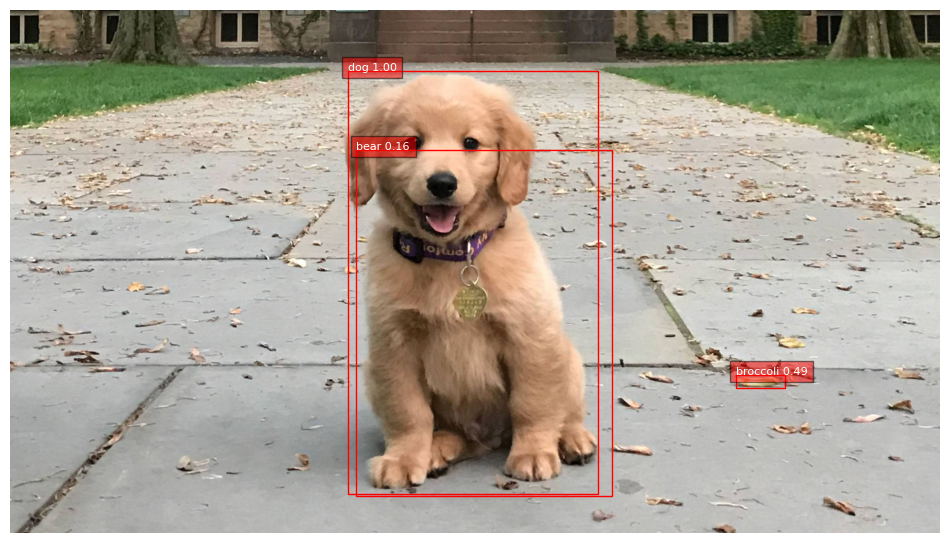

In [7]:
# COCO dataset class labels (commonly used for pre-trained models)

COCO_INSTANCE_CATEGORY_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


# Visualization with class names
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert tensor image back to numpy for visualization
img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
    x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()

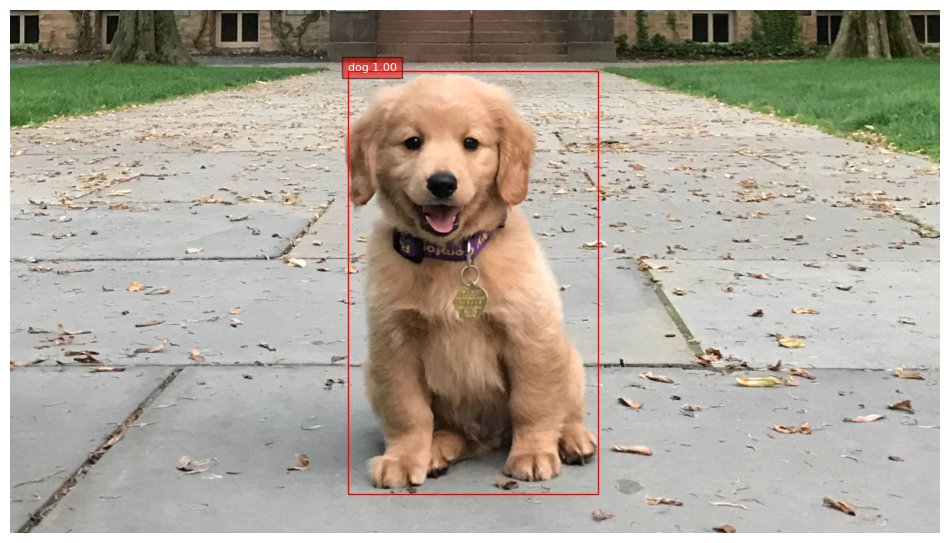

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set a threshold for displaying predictions
CONFIDENCE_THRESHOLD = 0.8  # for example, 50%

# Convert tensor image back to numpy for visualization
img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
    if score.item() > CONFIDENCE_THRESHOLD:
        x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well

        # Adjust for potential off-by-one error
        label_index = label.item()  # Assuming model's labels are 0-indexed
        # If labels are 1-indexed, subtract 1: label_index = label.item() - 1

        label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()

In [9]:
# Using SSD with MobileNet backbone
from torchvision.models.detection import ssdlite320_mobilenet_v3_large

object_detection_model = ssdlite320_mobilenet_v3_large(pretrained=True, progress=False)

object_detection_model.eval()  # Setting Model for Evaluation/Prediction
preds = object_detection_model(test_img_tensor)

C:\Users\chari\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\chari\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
preds = object_detection_model(test_img_tensor)
preds

[{'boxes': tensor([[ 704.1387,  151.7811, 1199.2643,  997.2056],
          [ 702.7568,  141.9723, 1210.4373, 1009.3834],
          [ 702.7568,  141.9723, 1210.4373, 1009.3834],
          ...,
          [ 986.2864,  545.6154, 1219.5789,  985.5599],
          [1270.4520,  698.3144, 1378.1626,  743.6047],
          [1220.7432,  488.1720, 1278.8723,  544.6700]],
         grad_fn=<StackBackward0>),
  'scores': tensor([0.9889, 0.0749, 0.0391, 0.0172, 0.0169, 0.0145, 0.0142, 0.0131, 0.0130,
          0.0127, 0.0124, 0.0123, 0.0122, 0.0122, 0.0122, 0.0121, 0.0120, 0.0120,
          0.0118, 0.0110, 0.0108, 0.0108, 0.0107, 0.0107, 0.0107, 0.0106, 0.0105,
          0.0103, 0.0103, 0.0101, 0.0099, 0.0097, 0.0096, 0.0096, 0.0096, 0.0096,
          0.0095, 0.0094, 0.0092, 0.0092, 0.0092, 0.0092, 0.0092, 0.0091, 0.0090,
          0.0089, 0.0088, 0.0087, 0.0086, 0.0086, 0.0086, 0.0086, 0.0085, 0.0085,
          0.0085, 0.0083, 0.0083, 0.0082, 0.0082, 0.0082, 0.0082, 0.0081, 0.0081,
          0.0081, 0

IndexError: list index out of range

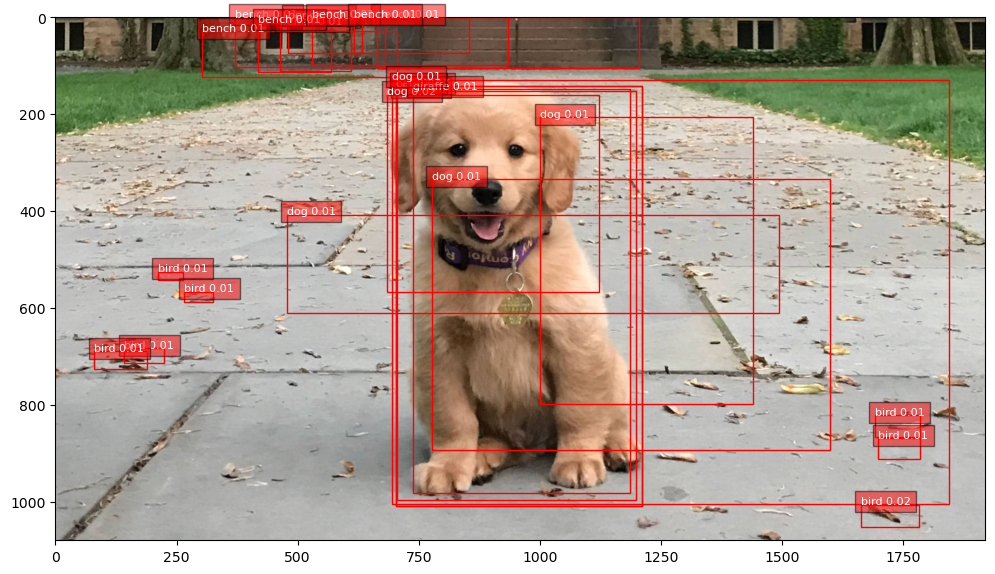

In [11]:
# COCO dataset class labels (commonly used for pre-trained models)

COCO_INSTANCE_CATEGORY_NAMES = [
    '','__background__','person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
    'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
    'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
    'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
    'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]


# Visualization with class names
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Convert tensor image back to numpy for visualization
img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
    x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well
    label_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()

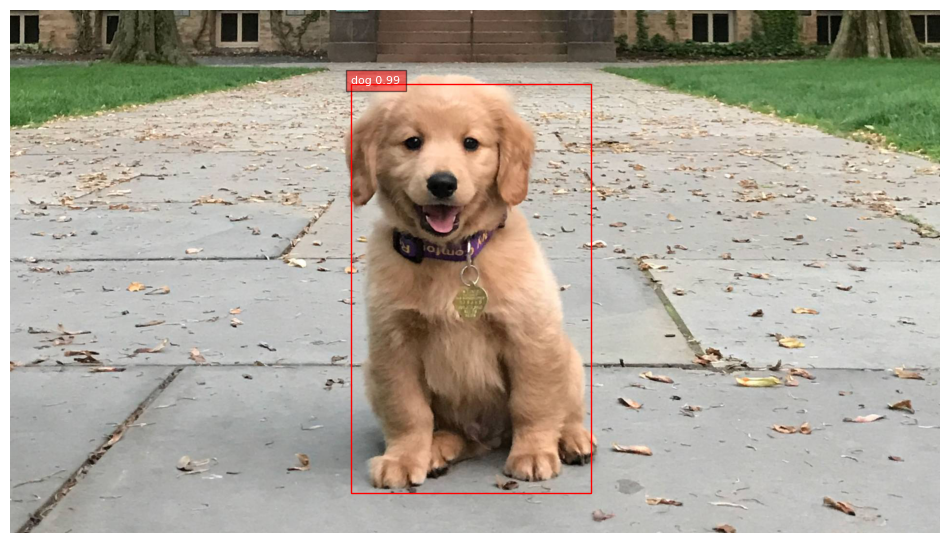

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set a threshold for displaying predictions
CONFIDENCE_THRESHOLD = 0.8  # for example, 50%

# Convert tensor image back to numpy for visualization
img = test_img_tensor.squeeze().detach().cpu().numpy()  # Adjust dimensions as necessary
img = img.transpose(1, 2, 0)  # Rearrange the dimensions from CxHxW to HxWxC for image display

# Create figure and axes
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(img)

# Add bounding boxes and labels
for box, label, score in zip(preds[0]['boxes'], preds[0]['labels'], preds[0]['scores']):
    if score.item() > CONFIDENCE_THRESHOLD:
        x1, y1, x2, y2 = box.detach().cpu().numpy()  # Make sure to detach and convert boxes as well

        # Adjust for potential off-by-one error
        label_index = label.item()  # Assuming model's labels are 0-indexed
        # If labels are 1-indexed, subtract 1: label_index = label.item() - 1

        label_name = COCO_INSTANCE_CATEGORY_NAMES[label_index]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.text(x1, y1, f'{label_name} {score.item():.2f}', color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

plt.axis('off')  # to turn off axes for better visualization
plt.show()